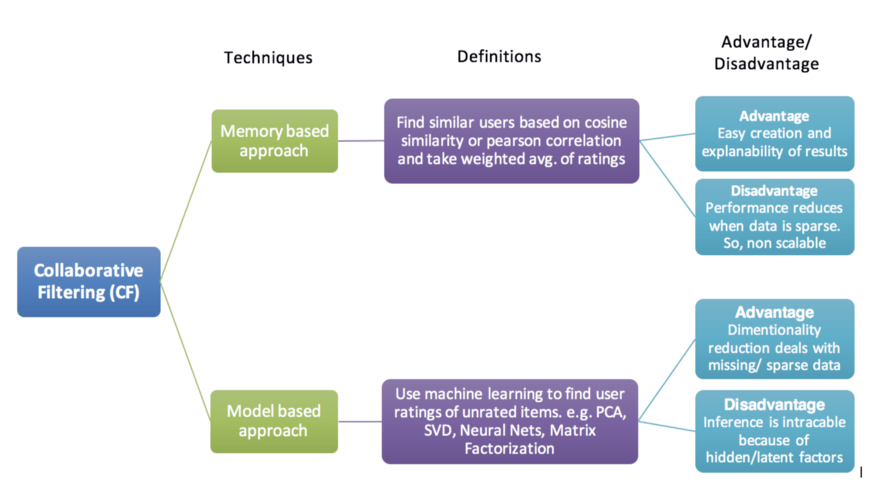

**Collaborative filtering** is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

## Table of Contents
1. Imports and Introduction
2. Memory based collaborative filtering  
    a. User-to-User based CF   
    b. Item-to-Item based CF  
 

# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import ast
import re

In [2]:
# importing the preprocessed metadata in notebook no.1
metadata=pd.read_csv('Dataset/prepared/final_metadata.csv')
metadata.head()

,movieId,title,year,genres,cast,director,collection,production_companies,vote_count,vote_average,popularity,keywords
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,Toy Story Collection,Pixar Animation Studios,5415.0,7.7,21.946943,"jealousy, toy, boy, friendship, friends, rival..."
1,8844,Jumanji,1995,"Adventure, Fantasy, Family","Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,NaN,"TriStar Pictures, Teitler Film, Interscope Com...",2413.0,6.9,17.015539,"disappearance, based on children's book, new h..."
2,15602,Grumpier Old Men,1995,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret",Howard Deutch,Grumpy Old Men Collection,"Warner Bros., Lancaster Gate",92.0,6.5,11.712900,"fishing, best friend, duringcreditsstinger"
3,31357,Waiting to Exhale,1995,"Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devine",Forest Whitaker,NaN,Twentieth Century Fox Film Corporation,34.0,6.1,3.859495,"based on novel, interracial relationship, sing..."
4,11862,Father of the Bride Part II,1995,Comedy,"Steve Martin, Diane Keaton, Martin Short",Charles Shyer,Father of the Bride Collection,"Sandollar Productions, Touchstone Pictures",173.0,5.7,8.387519,"baby, midlife crisis, confidence, aging, daugh..."


In [3]:
metadata=metadata[['movieId','title','genres']]
metadata.head()

,movieId,title,genres
0,862,Toy Story,"Animation, Comedy, Family"
1,8844,Jumanji,"Adventure, Fantasy, Family"
2,15602,Grumpier Old Men,"Romance, Comedy"
3,31357,Waiting to Exhale,"Comedy, Drama, Romance"
4,11862,Father of the Bride Part II,Comedy


In [4]:
ratings=pd.read_csv('Dataset/ratings.csv') # user rating dataset
ratings.drop(['timestamp'],axis=1,inplace=True)
ratings.head()

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [5]:
ratings.shape

(26024289, 3)

In [6]:
# the rating dataset is very huge which makes difficult to process
ratings=ratings.head(1000000)

# removing duplicates entries
metadata.drop_duplicates(subset='title',keep='last',inplace=True)
metadata.drop_duplicates(subset='movieId',keep='last',inplace=True)
ratings.drop_duplicates(inplace=True)

# removing null entries
ratings.dropna(inplace=True)
metadata.dropna(inplace=True)

# resetting index
ratings.reset_index(drop=True,inplace=True)
metadata.reset_index(drop=True,inplace=True)

# 2. Memory based Filtering

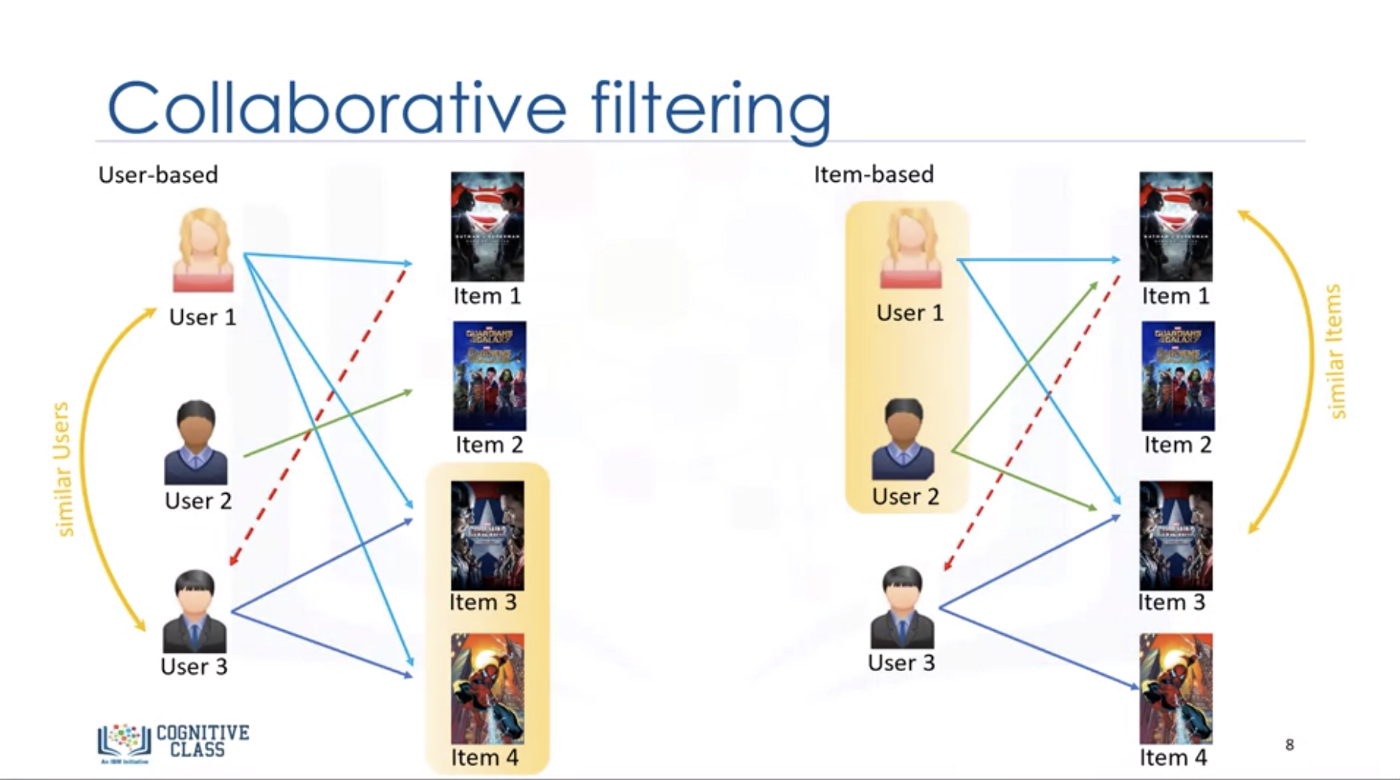

In [7]:
merged=pd.merge(ratings,metadata,on='movieId')
merged.head()

,userId,movieId,rating,title,genres
0,1,110,1.0,Three Colors: Red,"Drama, Mystery, Romance"
1,11,110,3.5,Three Colors: Red,"Drama, Mystery, Romance"
2,22,110,5.0,Three Colors: Red,"Drama, Mystery, Romance"
3,24,110,5.0,Three Colors: Red,"Drama, Mystery, Romance"
4,29,110,3.0,Three Colors: Red,"Drama, Mystery, Romance"


In [8]:
user_movie_df=merged.pivot_table(index='userId',columns='title',values='rating').fillna(0)
user_movie_df.head()

title,!Women Art Revolution,$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,...And God Created Woman,...And the Pursuit of Happiness,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,...,eXistenZ,xXx,¡A volar joven!,¡Three Amigos!,À nos amours,Åke and His World,Æon Flux,Ödipussi,Şaban Oğlu Şaban,Šíleně smutná princezna
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## a. User-to-User based collaboration


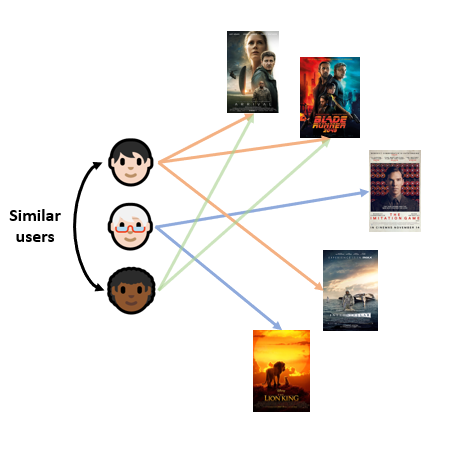

User-User Collaborative Filtering: “Users who are similar to you also liked …”

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

cosine=cosine_similarity(user_movie_df)
np.fill_diagonal(cosine,0)

user_to_user_similarity=pd.DataFrame(cosine,columns=user_movie_df.index,index=user_movie_df.index)

user_to_user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,10173,10174,10175,10176,10178,10179,10180,10181,10182,10183
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.256100,0.140235,0.130637,0.0,0.222760,0.067376,0.200983,0.000000,...,0.0,0.0,0.100042,0.068057,0.0,0.0,0.17798,0.000000,0.0,0.014654
2,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.058497,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.088206
3,0.256100,0.0,0.000000,0.000000,0.161217,0.0,0.000000,0.044544,0.000000,0.000000,...,0.0,0.0,0.132279,0.144808,0.0,0.0,0.00000,0.000000,0.0,0.000000
4,0.140235,0.0,0.000000,0.000000,0.081882,0.0,0.062518,0.065357,0.241079,0.000000,...,0.0,0.0,0.147806,0.077225,0.0,0.0,0.00000,0.000000,0.0,0.036740
5,0.130637,0.0,0.161217,0.081882,0.000000,0.0,0.000000,0.000000,0.136149,0.097163,...,0.0,0.0,0.030709,0.295466,0.0,0.0,0.00000,0.020888,0.0,0.000000


**Implementation**

In [10]:
def user_to_user_based_CF(user_rating,similarity,user,k=20,top_n=10):
    
    # get the similarity of all users with the given-user
    user_similarities=np.array(similarity[user])
    
    # getting the ids of top-similar users
    most_similar_users = user_rating.index[user_similarities.argpartition(-k)[-k:]]
    
    # obtaining the average rating of those users for all movies
    rec_movies = user_rating.loc[most_similar_users].mean(0).sort_values(ascending=False)

    # discarding the already seen movies
    seen=user_rating.loc[user].gt(0)
    
    seen_movies = seen.index[seen].tolist()
    rec_movies = rec_movies.drop(seen_movies).head(top_n)
    
    # return the infos of the recommended movies
    return rec_movies.index.to_frame().reset_index(drop=True).merge(metadata)


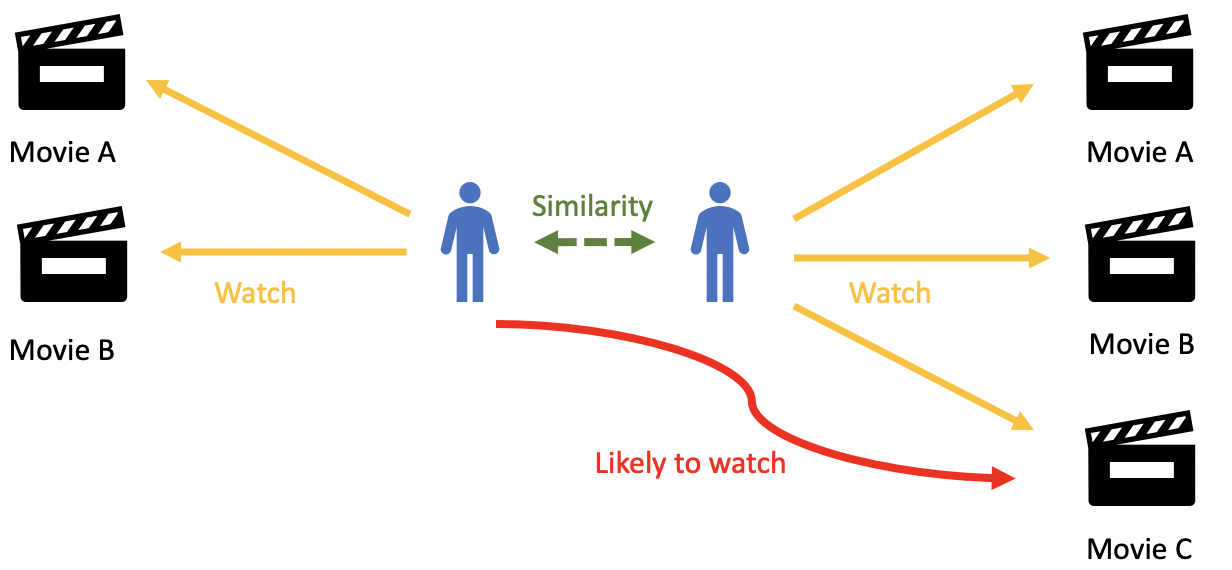

In [11]:
userId=2

user_to_user_based_CF(user_movie_df,user_to_user_similarity,userId)

,title,movieId,genres
0,2001: A Space Odyssey,62,"Science Fiction, Mystery, Adventure"
1,Men in Black II,608,"Action, Adventure, Comedy, Science Fiction"
2,Shaft in Africa,494,"Adventure, Action, Thriller, Crime, Mystery"
3,The Living Daylights,708,"Action, Adventure, Thriller"
4,Shadows in Paradise,3,"Drama, Comedy"
5,Judgment Night,6,"Action, Thriller, Crime"
6,Lolita,802,"Drama, Romance"
7,Run Lola Run,104,"Action, Drama, Thriller"
8,Kolya,784,"Music, Drama, Comedy"
9,Life Is Beautiful,637,"Comedy, Drama"


The above movies can be shown as " the users similar to you also liked these movies "

## b. Item-to-item based collaboration

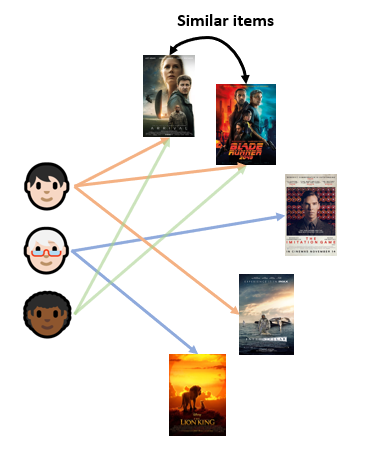

Item-Item Collaborative Filtering: “Users who liked this item also liked …”

In [12]:
user_movie_df2=user_movie_df.transpose()
user_movie_df2.head()

userId,1,2,3,4,5,6,7,8,9,10,...,10173,10174,10175,10176,10178,10179,10180,10181,10182,10183
title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$5 a Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Gator Bait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'R Xmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Twas the Night Before Christmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
cosine=cosine_similarity(user_movie_df2)
np.fill_diagonal(cosine,0)
item_to_item_similarity=pd.DataFrame(cosine,index=user_movie_df2.index,columns=user_movie_df2.index)
item_to_item_similarity.head()

title,!Women Art Revolution,$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,...And God Created Woman,...And the Pursuit of Happiness,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,...,eXistenZ,xXx,¡A volar joven!,¡Three Amigos!,À nos amours,Åke and His World,Æon Flux,Ödipussi,Şaban Oğlu Şaban,Šíleně smutná princezna
title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,0.000000,0.083357,0.0,0.106212,0.060296,0.000000,0.153142,0.000000,0.012130,0.079654,...,0.000000,0.125107,0.000000,0.000000,0.039857,0.0,0.0,0.000000,0.0,0.059873
$5 a Day,0.083357,0.000000,0.0,0.000000,0.107008,0.282166,0.000000,0.360948,0.068589,0.133902,...,0.139773,0.057157,0.000000,0.399043,0.198567,0.0,0.0,0.117107,0.0,0.130387
'Gator Bait,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.155186,0.000000,0.059086,0.000000,...,0.047475,0.069203,0.030638,0.000000,0.025323,0.0,0.0,0.000000,0.0,0.000000
'R Xmas,0.106212,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061072,...,0.000000,0.044846,0.000000,0.000000,0.000000,0.0,0.0,0.287771,0.0,0.000000
'Twas the Night Before Christmas,0.060296,0.107008,0.0,0.000000,0.000000,0.189618,0.125421,0.242560,0.070852,0.063270,...,0.073669,0.042706,0.000000,0.268161,0.028653,0.0,0.0,0.078697,0.0,0.069175


**Implementation**

In [14]:

def item_to_item_based_CF(similarity,movies,id):
    
    if id not in list(movies.movieId):
        return
    l=list(similarity.columns)
    name=movies[movies.movieId==id].title.values[0]
    if name not in list(similarity.columns):
        return
    
    s=list(enumerate(similarity[name]))
    s=sorted(s,key=lambda x: x[1],reverse=True)
    indexes=[a[0] for a in s[:10]]
    indexes=[l[x] for x in indexes]
    indexes=pd.DataFrame(indexes,columns={'title'})
    
    return indexes.merge(movies,on='title')



In [15]:
movieId=62
item_to_item_based_CF(item_to_item_similarity,metadata,movieId)

,title,movieId,genres
0,Donnie Darko,141,"Fantasy, Drama, Mystery"
1,Shadows in Paradise,3,"Drama, Comedy"
2,Four Rooms,5,"Crime, Comedy"
3,The Passion of Joan of Arc,780,"Drama, History"
4,Arlington Road,1073,"Drama, Thriller, Mystery"
5,Jarhead,25,"Drama, War"
6,Lolita,802,"Drama, Romance"
7,The Living Daylights,708,"Action, Adventure, Thriller"
8,Shaft in Africa,494,"Adventure, Action, Thriller, Crime, Mystery"
9,Almost Famous,786,"Drama, Music"


The above movies can be recommended as " the ones who liked this(movie-id=62) also liked these: "